<b>Use following sentences to find the tf*idf vectorized data.<b>

1. The postman delivered the package to the wrong address.
2. I wrapped a beautiful present for my friend's birthday.
3. The delivery truck arrived late due to heavy traffic.
4. We need to check the shipping address before sending the order.
5. Online shopping offers a wide variety of products with fast delivery.

In [1]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer()

In [2]:
sent1 = "The postman delivered the package to the wrong address."
sent2 = "I wrapped a beautiful present for my friend's birthday."
sent3 = "The delivery truck arrived late due to heavy traffic."
sent4 = "We need to check the shipping address before sending the order."
sent5 = "Online shopping offers a wide variety of products with fast delivery."

In [3]:
data = tfidf.fit_transform([sent1, sent2, sent3, sent4, sent5])

In [4]:
data.toarray()

array([[0.26692128, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.33084204, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.33084204, 0.33084204, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.66470631, 0.22156877, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.33084204],
       [0.        , 0.        , 0.37796447, 0.        , 0.37796447,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.37796447, 0.37796447, 0.        , 0.        , 0.37796447,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.37796447, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.37796

In [5]:
tfidf.get_feature_names_out()

array(['address', 'arrived', 'beautiful', 'before', 'birthday', 'check',
       'delivered', 'delivery', 'due', 'fast', 'for', 'friend', 'heavy',
       'late', 'my', 'need', 'of', 'offers', 'online', 'order', 'package',
       'postman', 'present', 'products', 'sending', 'shipping',
       'shopping', 'the', 'to', 'traffic', 'truck', 'variety', 'we',
       'wide', 'with', 'wrapped', 'wrong'], dtype=object)

In [6]:
import pandas as pd

In [7]:
df = pd.DataFrame(data=data.toarray(),
                  columns=tfidf.get_feature_names_out())

In [8]:
df

,address,arrived,beautiful,before,birthday,check,delivered,delivery,due,fast,...,the,to,traffic,truck,variety,we,wide,with,wrapped,wrong
0,0.266921,0.000000,0.000000,0.000000,0.000000,0.000000,0.330842,0.000000,0.000000,0.000000,...,0.664706,0.221569,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.330842
1,0.000000,0.000000,0.377964,0.000000,0.377964,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.377964,0.000000
2,0.000000,0.363987,0.000000,0.000000,0.000000,0.000000,0.000000,0.293662,0.363987,0.000000,...,0.243766,0.243766,0.363987,0.363987,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.256500,0.000000,0.000000,0.317925,0.000000,0.317925,0.000000,0.000000,0.000000,0.000000,...,0.425837,0.212918,0.000000,0.000000,0.000000,0.317925,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.259704,0.000000,0.321896,...,0.000000,0.000000,0.000000,0.000000,0.321896,0.000000,0.321896,0.321896,0.000000,0.000000


<b>Download the file spam_messages.csv from the link below:<b>
https://mitu.co.in/dataset/

t<b>
This file contains the collection of spam and not spam (ham) messages received in
the mail b<b>
o<b>x.
Perform the following operations on<b>
 it:
1. Read the file
2. Seperate input and output data
3. Explore the output data
4. Prepare and vectorize the data
5. Cross validate the data
6. Build the Decision Tree model for classification
7. Evaluate the performance of algorithm
8. Download the file sample.csv which contains the unknown mails. Predict the
category of these mails.

1. Read the file

In [9]:
import pandas as pd

import seaborn as sns

import matplotlib.pyplot as plt

In [10]:
df = pd.read_csv('spam_messages.csv')

2. Seperate input and output data

In [11]:
df.columns

Index(['Category', 'Message'], dtype='object')

In [12]:
features = df['Message'] #Input data

label = df['Category']  #Output data

x = features
y = label

In [13]:
features.head()

0    Go until jurong point, crazy.. Available only ...
1                        Ok lar... Joking wif u oni...
2    Free entry in 2 a wkly comp to win FA Cup fina...
3    U dun say so early hor... U c already then say...
4    Nah I don't think he goes to usf, he lives aro...
Name: Message, dtype: object

In [14]:
label

0        ham
1        ham
2       spam
3        ham
4        ham
        ... 
5567    spam
5568     ham
5569     ham
5570     ham
5571     ham
Name: Category, Length: 5572, dtype: object

<Axes: xlabel='Category', ylabel='count'>

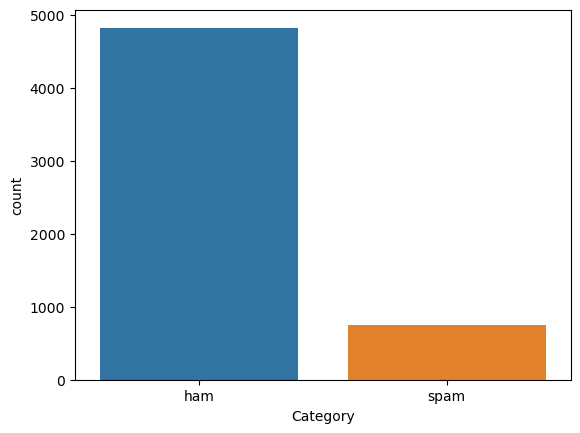

In [15]:
sns.countplot(x=label)

In [16]:
label.value_counts()

Category
ham     4825
spam     747
Name: count, dtype: int64

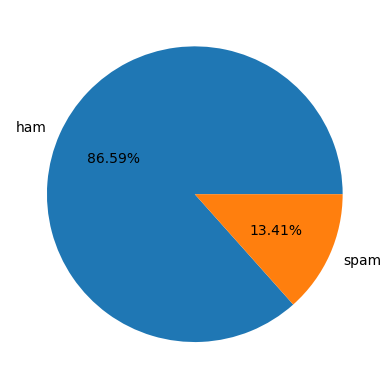

In [17]:
plt.pie(label.value_counts(), labels=label.value_counts().index, autopct='%2.2f%%');

3. Explore the output data

In [18]:
print(y.value_counts())

Category
ham     4825
spam     747
Name: count, dtype: int64


4. Prepare and vectorize the data

In [19]:
from nltk.tokenize import word_tokenize

from nltk.corpus import stopwords

from nltk.stem import PorterStemmer

In [20]:
sent = 'Hello friends! Let us work on our third assignment of the advanced course in Python Programming.'

In [21]:
swords = stopwords.words('english')
swords

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [22]:
ps = PorterStemmer()

In [23]:
def clean_text(sent):
    tokens1 = word_tokenize(sent)
    tokens2 = [x.lower() for x in tokens1 if x.isalpha()]
    tokens3 = [x for x in tokens2 if x not in swords]
    tokens4 = [ps.stem(x) for x in tokens3]
    return tokens4

In [24]:
clean_text(sent)

['hello',
 'friend',
 'let',
 'us',
 'work',
 'third',
 'assign',
 'advanc',
 'cours',
 'python',
 'program']

In [25]:
x[999]

'Then ü wait 4 me at bus stop aft ur lect lar. If i dun c ü then i go get my car then come back n pick ü.'

In [26]:
clean_text(x[999])

['ü',
 'wait',
 'bu',
 'stop',
 'aft',
 'ur',
 'lect',
 'lar',
 'dun',
 'c',
 'ü',
 'go',
 'get',
 'car',
 'come',
 'back',
 'n',
 'pick',
 'ü']

In [27]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(analyzer=clean_text)

In [28]:
x_new = tfidf.fit_transform(x)

In [29]:
x_new.shape

(5572, 5926)

5. Cross validate the data

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
x_train, x_test, y_train, y_test = train_test_split(x_new, label, random_state=0)

In [32]:
x_train.shape

(4179, 5926)

In [33]:
x_test.shape

(1393, 5926)

In [34]:
y_train.shape

(4179,)

In [35]:
y_test.shape

(1393,)

In [36]:
x_train[111]

<1x5926 sparse matrix of type '<class 'numpy.float64'>'
	with 4 stored elements in Compressed Sparse Row format>

In [37]:
y_train[111]

'ham'

6. Build the Decision Tree model for classification

In [38]:
from sklearn.tree import DecisionTreeClassifier

In [39]:
dt = DecisionTreeClassifier(random_state=0)

In [40]:
dt.fit(x_train, y_train)

DecisionTreeClassifier(random_state=0)

In [41]:
from sklearn.tree import plot_tree

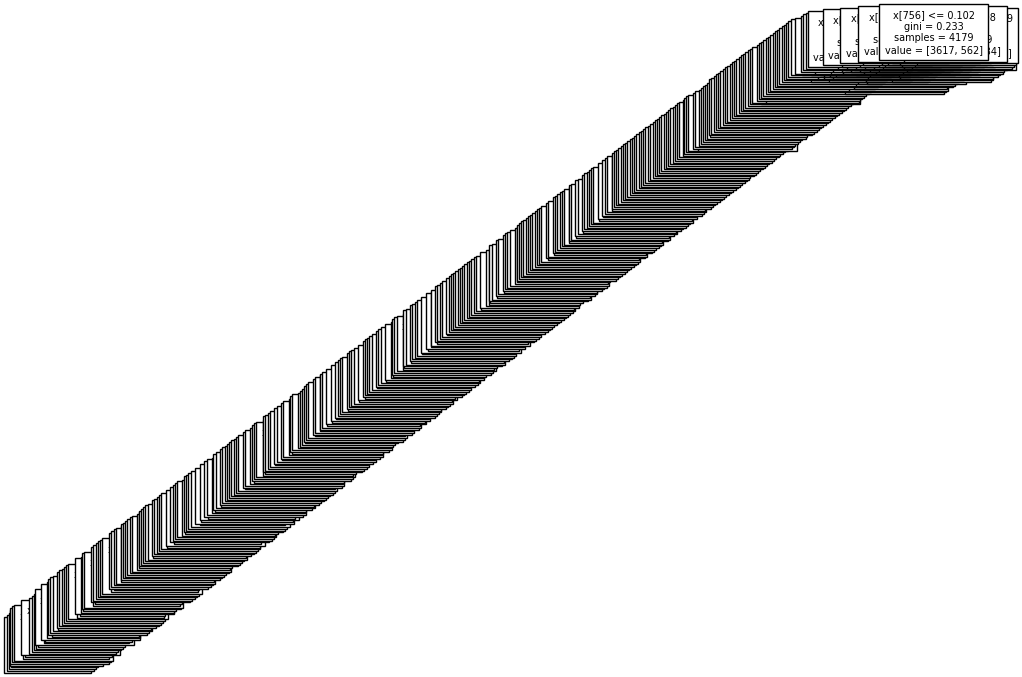

In [42]:
plt.figure(figsize=(12,8))
plot_tree(dt, fontsize=7);

In [43]:
tfidf.get_feature_names_out()[123]

'airtel'

In [44]:
tfidf.get_feature_names_out()[321]

'asther'

7. Evaluate the performance of algorithm

In [45]:
y_pred = dt.predict(x_test)

In [46]:
y_pred

array(['ham', 'spam', 'ham', ..., 'spam', 'ham', 'ham'], dtype=object)

In [47]:
len(y_pred)

1393

In [48]:
y_test

4456     ham
690     spam
944      ham
3768     ham
1189     ham
        ... 
1889     ham
2250    spam
2915    spam
1282     ham
1206     ham
Name: Category, Length: 1393, dtype: object

In [49]:
from sklearn.metrics import ConfusionMatrixDisplay

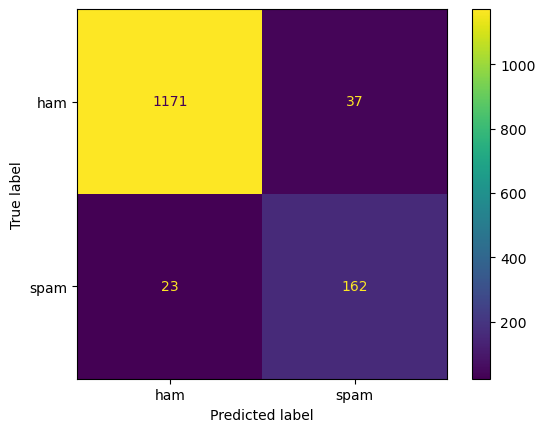

In [50]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred);

In [51]:
(1171+162) / 1393

0.9569274946159368

In [52]:
1171 / 1208

0.9693708609271523

In [53]:
162 / 185

0.8756756756756757

8. Download the file sample.csv which contains the unknown mails. Predict the
category of these mails.

In [54]:
f = open('sample.csv')

In [55]:
emails = f.readlines()

In [56]:
emails

['Ok lar i double check wif da hair dresser already he said wun cut v short. He said will cut until i look nice.,,\n',
 'As a valued customer, I am pleased to advise you that following recent review of your Mob No. you are awarded with a Â£1500 Bonus Prize, call 09066364589\n',
 '"Today is ""song dedicated day.."" Which song will u dedicate for me? Send this to all ur valuable frnds but first rply me...",,\n']

In [57]:
tfidf.transform(emails)

<3x5926 sparse matrix of type '<class 'numpy.float64'>'
	with 38 stored elements in Compressed Sparse Row format>

In [58]:
dt.predict(tfidf.transform(emails))

array(['ham', 'spam', 'ham'], dtype=object)

In [59]:
len(emails)

3